In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def get_traj(spokes_per_frame, csmaps=False, N_spokes=13, N_time=1, base_res=320, gind=1):

    N_tot_spokes = N_spokes * N_time

    N_samples = base_res * 2

    base_lin = np.arange(N_samples).reshape(1, -1) - base_res

    tau = 0.5 * (1 + 5**0.5)
    base_rad = np.pi / (gind + tau - 1)

    base_rot = np.arange(N_tot_spokes).reshape(-1, 1) * base_rad

    traj = np.zeros((N_tot_spokes, N_samples, 2))
    traj[..., 0] = np.cos(base_rot) @ base_lin
    traj[..., 1] = np.sin(base_rot) @ base_lin

    traj = traj / 2

    traj = traj.reshape(N_time, N_spokes, N_samples, 2)

    if spokes_per_frame == 288 and csmaps == False:
        return traj
    else:
        return np.squeeze(traj)

In [7]:
# Generate the trajectory
spokes_per_frame=288
N_spokes=288
N_time=1
traj = get_traj(spokes_per_frame, N_spokes=N_spokes, N_time=N_time, base_res=320)

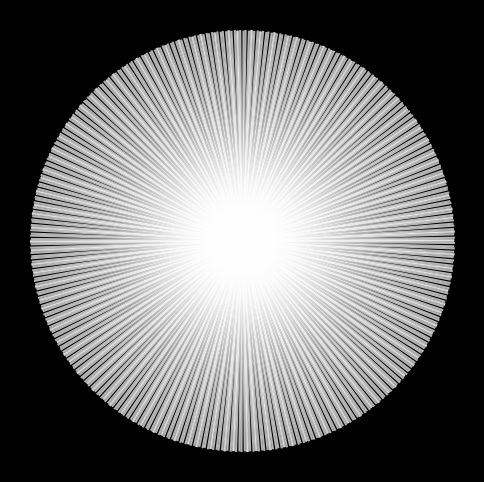

In [12]:
# Plotting
plt.figure(figsize=(6, 6), facecolor="black")
for t in range(N_time):
    for s in range(N_spokes):
        plt.plot(traj[t, s, :, 0], traj[t, s, :, 1], color='white', alpha=0.7)

# plt.title('K-space Trajectory')
# plt.xlabel('kx')
# plt.ylabel('ky')
plt.axis('off')
# plt.grid(True)
plt.show()

In [13]:
print(traj.shape)

(1, 288, 640, 2)


In [16]:
mask = np.zeros(traj.shape, dtype=np.float32)
print(mask.shape)

percentage_to_keep = 0.1

# Randomly choose which spokes to keep
num_spokes_to_keep = round(N_spokes * percentage_to_keep)
indices_to_keep = np.random.choice(N_spokes, num_spokes_to_keep, replace=False)

# Set the selected spokes to 1 in the mask
mask[:, indices_to_keep, :, :] = 1

(1, 288, 640, 2)


In [18]:
# Apply the mask to the k-space data
undersampled_traj = traj * mask

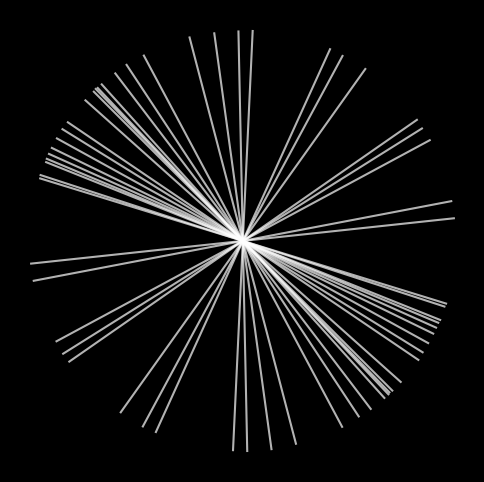

In [19]:
# Plotting
plt.figure(figsize=(6, 6), facecolor="black")
for t in range(N_time):
    for s in range(N_spokes):
        plt.plot(undersampled_traj[t, s, :, 0], undersampled_traj[t, s, :, 1], color='white', alpha=0.7)

# plt.title('K-space Trajectory')
# plt.xlabel('kx')
# plt.ylabel('ky')
plt.axis('off')
# plt.grid(True)
plt.show()